# 1. Cargar el Dataset

In [2]:
#Descargamos los datos
import requests
import os
import warnings

def warn(*args, **kwargs):
    pass
warnings.warn = warn
warnings.filterwarnings("ignore", category=FutureWarning)

url = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"
filename = os.path.basename(url)

save_dir = os.path.join(os.path.pardir, "data", "raw")  # ../data/raw
save_path = os.path.join(save_dir, filename)

os.makedirs(os.path.dirname(save_path), exist_ok=True)

response = requests.get(url)
with open(save_path, 'wb') as f:
    f.write(response.content)

print(f"Archivo guardado en: {save_path}")

Archivo guardado en: ../data/raw/bank-marketing-campaign-data.csv


In [3]:
#Cargar el dataset
import pandas as pd

# Ruta relativa al archivo desde src/
csv_path = os.path.join(os.path.pardir, "data", "raw", "bank-marketing-campaign-data.csv")

# Cargar el dataset en una variable (DataFrame)
total_data = pd.read_csv(csv_path, sep=';')

# Análisis Exploratorio y Limpieza de Datos

El banco portugués está teniendo una disminución en sus ingresos, por lo que busca identificar cuáles de sus clientes actuales tienen mayor probabilidad de contratar un depósito a largo plazo.

Se desarrollará un algoritmo de clasificación que permita predecir si un cliente aceptará o no un depósito a largo plazo.

- *age:* Age of customer (numeric)
- *job:* Type of job (categorical)
- *marital:* Marital status (categorical)
- *education:* Level of education (categorical)
- *default:* Do you currently have credit (categorical)
- *housing:* Do you have a housing loan (categorical)
- *loan:* Do you have a personal loan? (categorical)
- *contact:* Type of contact communication (categorical)
- *month:* Last month in which you have been contacted (categorical)
- *day_of_week:* Last day on which you have been contacted (categorical)
- *duration:* Duration of previous contact in seconds (numeric)
- *campaign:* Number of contacts made during this campaign to the customer (numeric)
- *pdays:* Number of days that elapsed since the last campaign until the customer was contacted (numeric)
- *previous:* Number of contacts made during the previous campaign to the customer (numeric)
- *poutcome:* Result of the previous marketing campaign (categorical)
- *emp.var.rate:* Employment variation rate. Quarterly indicator (numeric)
- *cons.price.idx:* Consumer price index. Monthly indicator (numeric)
- *cons.conf.idx:* Consumer confidence index. Monthly indicator (numeric)
- *euribor3m:* EURIBOR 3-month rate. Daily indicator (numeric)
- *nr.employed:* Number of employees. Quarterly indicator (numeric)
- *y:* TARGET. Whether the customer takes out a long-term deposit or not (categorical)

In [4]:
#Obtener Dimensiones
print(total_data.shape)

#Obtener Información sobre los tipos de datos
print(total_data.info())

(41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   411

Hay un total de 41188 filas (en este caso, clientes) y 21 columnas, entre las cuales se encuentra la clase a predecir, ***y***. No hay instancias con valores nulos. El conjunto de datos tiene 10 variables numéricas y 11 variables categóricas.

**Eliminar Duplicados**

Como no tenemos alguna columna que pueda servir como id único, eliminamos las filas duplicadas sin filtrar por columna.

In [5]:
total_data.drop_duplicates()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Había 12 filas duplicadas.

**Eliminar Información Irrelevante**

En esta etapa tan temprana no eliminaremos ninguna columna, pues no hay datos identificativos de los clientes que resulten irrelevantes al análisis.

# Análisis Univariante

Hacemos un análisis de las variables del dataset. Para ello, graficaremos histogramas, boxplots, diagramas de barras y diagramas de dispersión.

**Variables Numéricas**

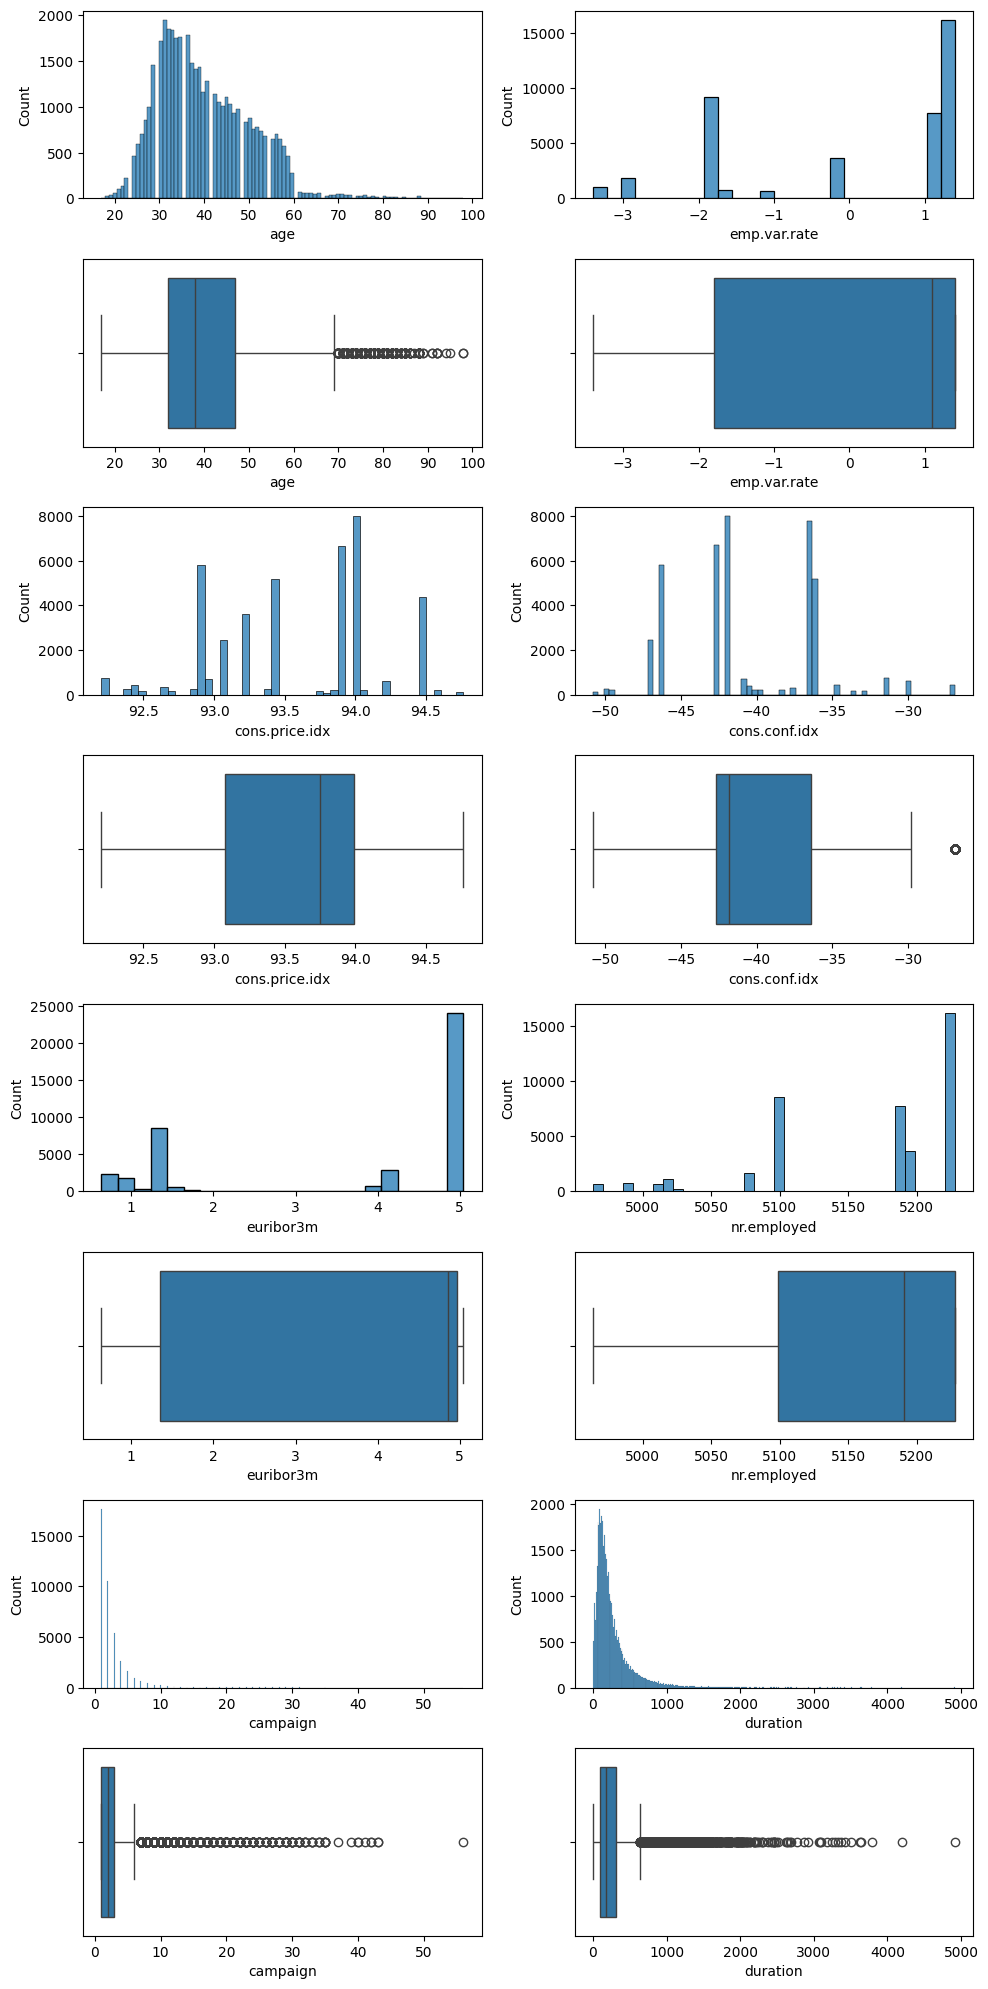

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(8, 2, figsize = (10, 20))

sns.histplot(ax = axis[0, 0], data = total_data, x = "age")
sns.boxplot(ax = axis[1, 0], data = total_data, x = "age")
sns.histplot(ax = axis[0, 1], data = total_data, x = "emp.var.rate")
sns.boxplot(ax = axis[1, 1], data = total_data, x = "emp.var.rate")
sns.histplot(ax = axis[2,0], data = total_data, x = "cons.price.idx")
sns.boxplot(ax = axis[3,0], data = total_data, x = "cons.price.idx")
sns.histplot(ax = axis[2,1], data = total_data, x = "cons.conf.idx")
sns.boxplot(ax = axis[3,1], data = total_data, x = "cons.conf.idx")
sns.histplot(ax = axis[4,0], data = total_data, x = "euribor3m")
sns.boxplot(ax = axis[5,0], data = total_data, x = "euribor3m")
sns.histplot(ax = axis[4,1], data = total_data, x = "nr.employed")
sns.boxplot(ax = axis[5,1], data = total_data, x = "nr.employed")
sns.histplot(ax = axis[6,0], data = total_data, x = "campaign")
sns.boxplot(ax = axis[7,0], data = total_data, x = "campaign")
sns.histplot(ax = axis[6,1], data = total_data, x = "duration")
sns.boxplot(ax = axis[7,1], data = total_data, x = "duration")

plt.tight_layout()
plt.show()

Los histogramas y gráficos de caja nos muestran la distribución y dispersión de las variables:

- *age*: Los datos se distribuyen entre los 18 y los 30 años, estando la moda cerca de los 30 años. El diagrama de cajas nos muestra que hay mayor dispersión de los datos después de la mediana, con valores atípicos cerca de los 70 años.

- *emp.var.rate*: Los datos van desde antes de -3 hasta después de 1. La moda está después de 1 y el boxplot muestra que la mayor dispersión está a la izquierda de la mediana, sin valores atípicos.

- *cons.price.idx*: Vemos que los datos se distribuyen aproximadamente entre 90 y 95. La moda está en 94 y el boxplot muestra que hay mayor dispersión de datos a la izquierda de la mediana, sin valores atípicos.

- *cons.conf.idx*: Vemos que los datos se distribuyen entre menos de -50 y poco más de -30. Hay tres modas: una cerca de -47, una cerca de -42 y una cerca de -37. El boxplot muestra que hay mayor dispersión de datos a la derecha de la mediana, con pocos valores atípicos.

- *euribor3m*: Los datos se distribuyen entre poco antes de 1 y poco después de 5, con la moda en 5. El boxplot muestra que los datos tienen mayor dispersión a la izquierda de la mediana y no hay valores atípicos.

- *nr.employed*: Los datos se distribuyen entre antes de 5000 y poco después de 5200, con la moda sobre los 5200. El diagrama de cajas muestra que los datos tienen mayor dispersión a la izquierda de la mediana y no hay valores atípicos.

- *campaign*: Los datos se distribuyen entre poco después de 0 y poco después de 50, con la moda cerca de 0. El diagrama de cajas muestra que los datos tienen mayor dispersión a la derecha de la mediana con valores atípicos desde antes de 10.

- *duration*: Los datos se distribuyen entre 0 y 5000, con la moda cerca de 0. El diagrama de cajas muestra que los datos tienen mayor dispersión a la derecha de la mediana con valores atípicos desde antes de 1000.

**Variables Categóricas**

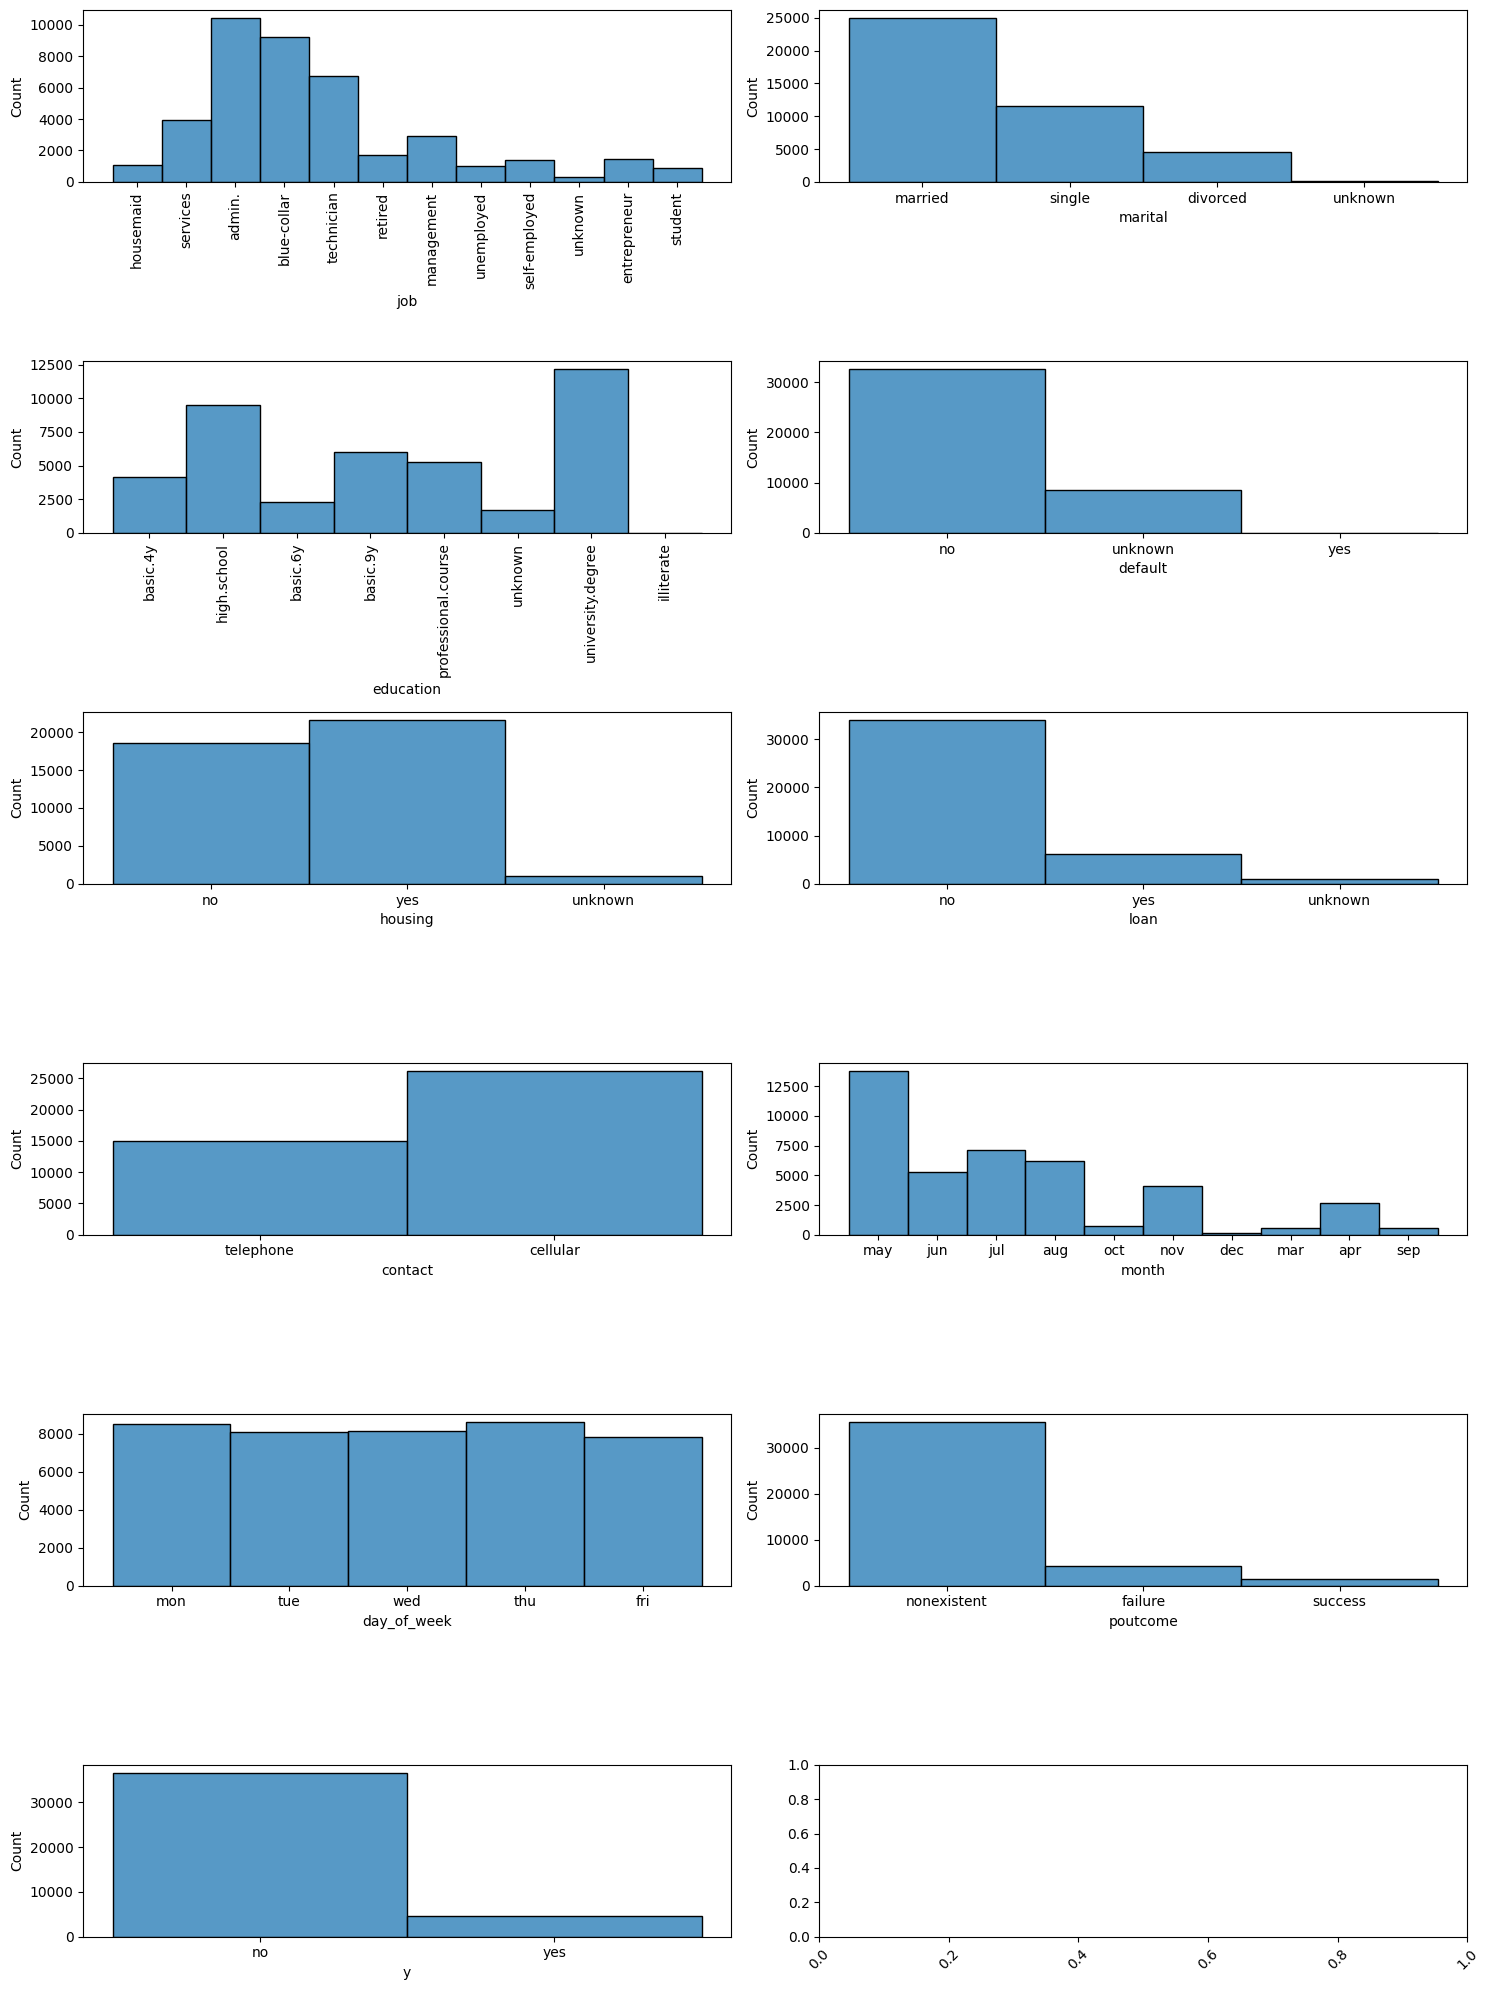

In [7]:
fig, axis = plt.subplots(6, 2, figsize=(15, 20))

sns.histplot(ax = axis[0, 0], data = total_data, x = "job")
axis[0, 0].tick_params(axis='x', rotation=90)
sns.histplot(ax = axis[0, 1], data = total_data, x = "marital")
plt.xticks(rotation=45)
sns.histplot(ax = axis[1, 0], data = total_data, x = "education")
plt.xticks(rotation=45)
sns.histplot(ax = axis[1, 1], data = total_data, x = "default")
axis[1, 0].tick_params(axis='x', rotation=90)
sns.histplot(ax = axis[2, 0], data = total_data, x = "housing")
plt.xticks(rotation=45)
sns.histplot(ax = axis[2,1], data = total_data, x = "loan")
plt.xticks(rotation=45)
sns.histplot(ax = axis[3, 0], data = total_data, x = "contact")
plt.xticks(rotation=45)
sns.histplot(ax = axis[3, 1], data = total_data, x = "month")
plt.xticks(rotation=45)
sns.histplot(ax = axis[4, 0], data = total_data, x = "day_of_week")
plt.xticks(rotation=45)
sns.histplot(ax = axis[4,1], data = total_data, x = "poutcome")
plt.xticks(rotation=45)
sns.histplot(ax = axis[5, 0], data = total_data, x = "y")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Los gráficos nos muestran la distribución de valores categóricos para cada columna del dataset:

- *job*: La mayoría de las personas contactadas tiene trabajos administrativos. El grupo con menos presencia en el dataset es aquel de profesión desconocida.

- *marital*: La mayoría de las personas contactadas está casada. La categoría menos frecuente es de estado civil desconocido.

- *education*: La mayoría de las personas contactadas tiene algún título universitario. La categoría menos frecuente está conformada por personas analfabetas.

- *default*: La mayoría de las personas contactadas no tenía un crédito para el momento del contacto. La categoría menos frecuente está conformada por personas que sí tenían un crédito para el momento del contacto.

- *housing*: La mayoría de las personas contactadas tenía un préstamo hipotecario para el momento del contacto. La categoría menos frecuente está conformada por personas que no dieron esa información.

- *loan*: La mayoría de las personas contactadas no tenía un préstamo personal para el momento del contacto. La categoría menos frecuente está conformada por personas que no dieron esa información.

- *contact*: La mayoría de las personas fue contactada por teléfono celular. El resto de las personas fue contactada por teléfono fijo.

- *month*: La mayoría de las personas fue contactadas en el mes de mayo. La categoría menos frecuente está conformada por personas contactadas en diciembre.

- *day_of_week*: La mayoría de las personas fueron contactadas el día jueves, aunque la distribución es bastante pareja entre todas las categorías. La categoría menos frecuente está conformada por personas contactadas los días viernes.

- *p_outcome*: La categoría más popular es de resultados no existentes (personas que no fueron contactadas en la campaña anterior). La categoría menos frecuente es de personas cuyo contacto en la campaña anterior fue exitoso.

- *y*: La mayoría de las personas contactadas no tiene un préstamo personal.

# Análisis Multivariante

**Análisis Categórico-Categórico**

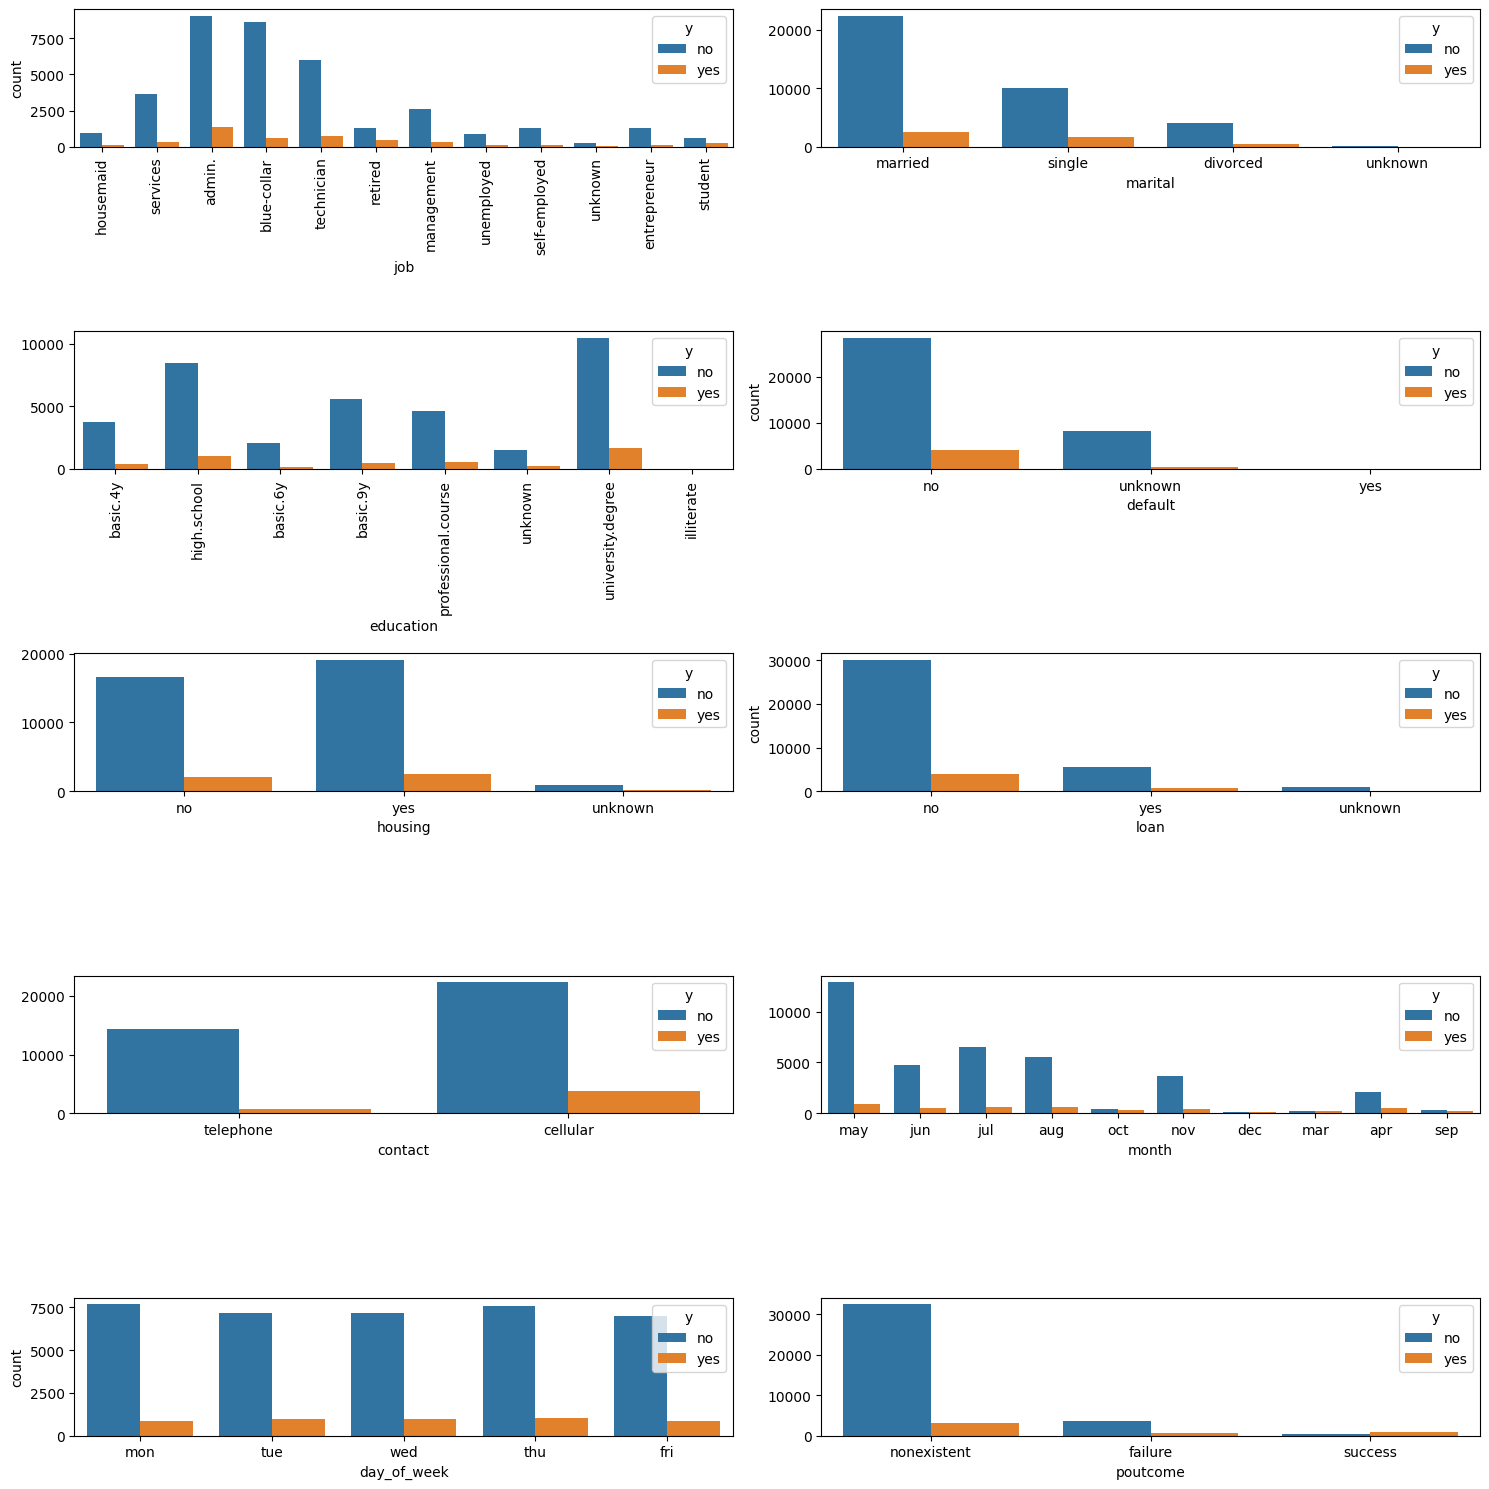

In [8]:
fig, axis = plt.subplots(5, 2, figsize = (15, 15))

sns.countplot(ax = axis[0, 0], data = total_data, x = "job", hue = "y")
axis[0, 0].tick_params(axis='x', rotation=90)
sns.countplot(ax = axis[0, 1], data = total_data, x = "marital", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[1, 0], data = total_data, x = "education", hue = "y").set(ylabel = None)
axis[1, 0].tick_params(axis='x', rotation=90)
sns.countplot(ax = axis[1, 1], data = total_data, x = "default", hue = "y")
sns.countplot(ax = axis[2, 0], data = total_data, x = "housing", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[2, 1], data = total_data, x = "loan", hue = "y")
sns.countplot(ax = axis[3, 0], data = total_data, x = "contact", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[3, 1], data = total_data, x = "month", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[4, 0], data = total_data, x = "day_of_week", hue = "y")
sns.countplot(ax = axis[4, 1], data = total_data, x = "poutcome", hue = "y").set(ylabel = None)

plt.tight_layout()

plt.show()

Podemos observar que para todas las variables categóricas del dataset, la mayoría de las personas contactadas no contrató un préstamo. Esto tiene sentido si consideramos la cantidad de personas que no contrataron un préstamo en comparación con las que sí lo hicieron.

**Análisis Categórico-Numérico**

Para este análisis factorizamos las variables categóricas en numéricas y observamos el mapa de calor y la correlación entre ellas.

In [9]:
total_data["job_n"] = pd.factorize(total_data["job"])[0]
total_data[["job_n", "job"]]

job_rules = {row["job"]: row["job_n"] for index, row in total_data[["job_n", "job"]].drop_duplicates().iterrows()}

import json

with open("./job_rules.json", "w") as f:
  json.dump(job_rules, f)

with open("./job_rules.json", "r") as f:
    y_rules = json.load(f)

total_data["job_n"] = total_data["job"].apply(lambda x: job_rules[x])

In [10]:
total_data["marital_n"] = pd.factorize(total_data["marital"])[0]
total_data[["marital_n", "marital"]]

marital_rules = {row["marital"]: row["marital_n"] for index, row in total_data[["marital_n", "marital"]].drop_duplicates().iterrows()}

import json

with open("./marital_rules.json", "w") as f:
  json.dump(marital_rules, f)

with open("./marital_rules.json", "r") as f:
    y_rules = json.load(f)

total_data["marital_n"] = total_data["marital"].apply(lambda x: marital_rules[x])

In [11]:
total_data["education_n"] = pd.factorize(total_data["education"])[0]
total_data[["education_n", "education"]]

education_rules = {row["education"]: row["education_n"] for index, row in total_data[["education_n", "education"]].drop_duplicates().iterrows()}

import json

with open("./education_rules.json", "w") as f:
  json.dump(education_rules, f)

with open("./education_rules.json", "r") as f:
    y_rules = json.load(f)

total_data["education_n"] = total_data["education"].apply(lambda x: education_rules[x])

In [12]:
total_data["default_n"] = pd.factorize(total_data["default"])[0]
total_data[["default_n", "default"]]

default_rules = {row["default"]: row["default_n"] for index, row in total_data[["default_n", "default"]].drop_duplicates().iterrows()}

import json

with open("./default_rules.json", "w") as f:
  json.dump(default_rules, f)

with open("./default_rules.json", "r") as f:
    y_rules = json.load(f)

total_data["default_n"] = total_data["default"].apply(lambda x: default_rules[x])

In [13]:
total_data["housing_n"] = pd.factorize(total_data["housing"])[0]
total_data[["housing_n", "housing"]]

housing_rules = {row["housing"]: row["housing_n"] for index, row in total_data[["housing_n", "housing"]].drop_duplicates().iterrows()}

import json

with open("./housing_rules.json", "w") as f:
  json.dump(housing_rules, f)

with open("./housing_rules.json", "r") as f:
    y_rules = json.load(f)

total_data["housing_n"] = total_data["housing"].apply(lambda x: housing_rules[x])

In [14]:
total_data["loan_n"] = pd.factorize(total_data["loan"])[0]
total_data[["loan_n", "loan"]]

loan_rules = {row["loan"]: row["loan_n"] for index, row in total_data[["loan_n", "loan"]].drop_duplicates().iterrows()}

import json

with open("./loan_rules.json", "w") as f:
  json.dump(loan_rules, f)

with open("./loan_rules.json", "r") as f:
    y_rules = json.load(f)

total_data["loan_n"] = total_data["loan"].apply(lambda x: loan_rules[x])

In [15]:
total_data["contact_n"] = pd.factorize(total_data["contact"])[0]
total_data[["contact_n", "contact"]]

contact_rules = {row["contact"]: row["contact_n"] for index, row in total_data[["contact_n", "contact"]].drop_duplicates().iterrows()}

import json

with open("./contact_rules.json", "w") as f:
  json.dump(contact_rules, f)

with open("./contact_rules.json", "r") as f:
    y_rules = json.load(f)

total_data["contact_n"] = total_data["contact"].apply(lambda x: contact_rules[x])

In [16]:
total_data["month_n"] = pd.factorize(total_data["month"])[0]
total_data[["month_n", "month"]]

month_rules = {row["month"]: row["month_n"] for index, row in total_data[["month_n", "month"]].drop_duplicates().iterrows()}

import json

with open("./month_rules.json", "w") as f:
  json.dump(month_rules, f)

with open("./month_rules.json", "r") as f:
    y_rules = json.load(f)

total_data["month_n"] = total_data["month"].apply(lambda x: month_rules[x])

In [17]:
total_data["day_of_week_n"] = pd.factorize(total_data["day_of_week"])[0]
total_data[["day_of_week_n", "day_of_week"]]

day_of_week_rules = {row["day_of_week"]: row["day_of_week_n"] for index, row in total_data[["day_of_week_n", "day_of_week"]].drop_duplicates().iterrows()}

import json

with open("./day_of_week_rules.json", "w") as f:
  json.dump(day_of_week_rules, f)

with open("./day_of_week_rules.json", "r") as f:
    y_rules = json.load(f)

total_data["day_of_week_n"] = total_data["day_of_week"].apply(lambda x: day_of_week_rules[x])

In [18]:
total_data["poutcome_n"] = pd.factorize(total_data["poutcome"])[0]
total_data[["poutcome_n", "poutcome"]]

poutcome_rules = {row["poutcome"]: row["poutcome_n"] for index, row in total_data[["poutcome_n", "poutcome"]].drop_duplicates().iterrows()}

import json

with open("./poutcome_rules.json", "w") as f:
  json.dump(poutcome_rules, f)

with open("./poutcome_rules.json", "r") as f:
    y_rules = json.load(f)

total_data["poutcome_n"] = total_data["poutcome"].apply(lambda x: poutcome_rules[x])

In [19]:
total_data["y_n"] = pd.factorize(total_data["y"])[0]
total_data[["y_n", "y"]]

y_rules = {row["y"]: row["y_n"] for index, row in total_data[["y_n", "y"]].drop_duplicates().iterrows()}

import json

with open("./y_rules.json", "w") as f:
  json.dump(y_rules, f)

with open("./y_rules.json", "r") as f:
    y_rules = json.load(f)

total_data["y_n"] = total_data["y"].apply(lambda x: y_rules[x])

In [20]:
total_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,y_n
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,1,1,0,0,0,0,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,1,0,1,0,0,0,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,2,0,0,0,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,1,0,0,1,0,0,0,0,0


Tras haber factorizado las variables predictoras, hacemos la matriz de correlaciones y el mapa de calor de todas las variables del dataset.

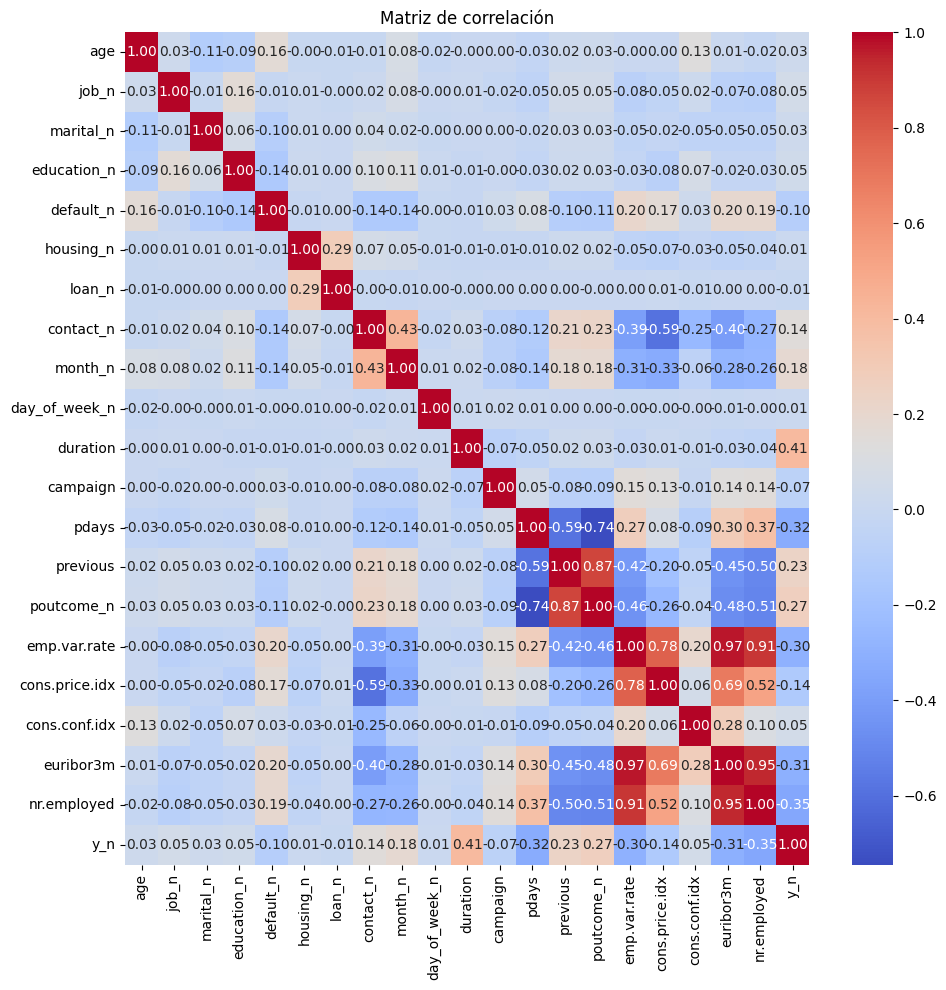

In [21]:
fig, axis = plt.subplots(figsize = (10, 10))

sns.heatmap(total_data[["age", "job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "contact_n", "month_n", "day_of_week_n", "duration", "campaign", "pdays", "previous", "poutcome_n", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y_n"]].corr(), annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Matriz de correlación")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

Algunas relaciones que vemos en la matriz de correlaciones es que la variable previous y la variable poutcome_n están muy relacionadas, al igual que poutcome_n y pdays. También vemos que nr.employed y emp.var.rate tienen una relación muy alta y podría resultar redundante mantener ambas en el dataset final.

Hay variables predictivas que no parecen tener mucha correlación con la variable objetivo, como la edad de la persona contactada, su profesión o su estado civil.

La variable predictiva que tiene mayor correlación con la variable objetivo es duration, seguida de poutcome_n y previous. Luego tenemos variables con una correlación negativa media, como pdays, nr.employed y euribor3m. Esta correlación negativa tiene sentido pues, en casos como pdays, si una persona tomó un crédito en la campaña anterior, es más probable que no tome un crédito en la campaña actual.

Observando la matriz de correlaciones, podemos eliminar las variables predictivas que menos correlación tienen con la variable objetivo.

**Eliminar Variables**

In [22]:
new_data = total_data[["default_n","contact_n","month_n","duration", "pdays", "previous", "poutcome_n", "emp.var.rate", "cons.price.idx", "euribor3m", "nr.employed", "y_n"]]

new_data.head()

,default_n,contact_n,month_n,duration,pdays,previous,poutcome_n,emp.var.rate,cons.price.idx,euribor3m,nr.employed,y_n
0,0,0,0,261,999,0,0,1.1,93.994,4.857,5191.0,0
1,1,0,0,149,999,0,0,1.1,93.994,4.857,5191.0,0
2,0,0,0,226,999,0,0,1.1,93.994,4.857,5191.0,0
3,0,0,0,151,999,0,0,1.1,93.994,4.857,5191.0,0
4,0,0,0,307,999,0,0,1.1,93.994,4.857,5191.0,0


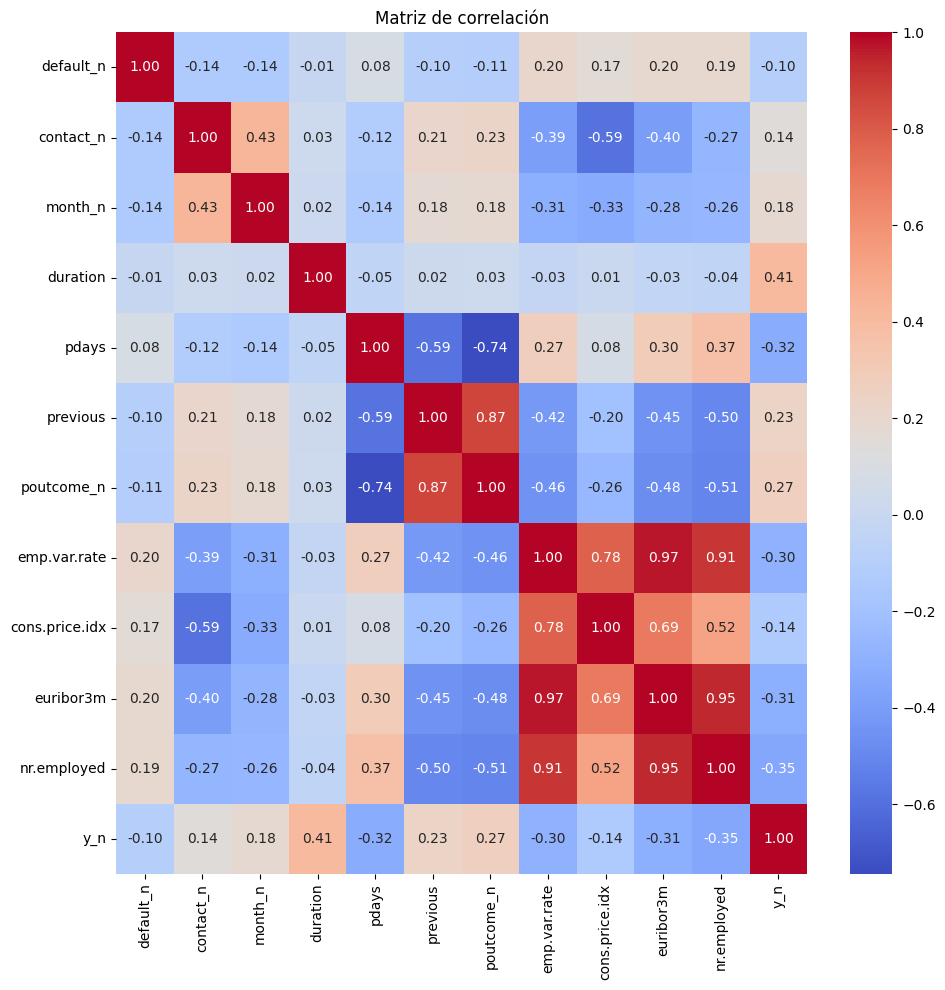

In [23]:
fig, axis = plt.subplots(figsize = (10, 10))

sns.heatmap(new_data[["default_n","contact_n","month_n","duration", "pdays", "previous", "poutcome_n", "emp.var.rate", "cons.price.idx", "euribor3m", "nr.employed", "y_n"]].corr(), annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Matriz de correlación")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

Con este nuevo mapa de calor más reducido, podemos hacer un segundo análisis de las correlaciones que puedan resultar de interés.

Vemos que en relación a casi todas las variables (tanto predictoras como objetivo), las variables *previous* y *poutcome_n* tienen una correlación muy similar. Esto podría traer problemas al construir el modelo de regresión logística, por lo que eliminaremos *previous* (que es la que menor correlación tiene con la variable objetivo).

Algo similar ocurre con *euribor3m* y *nr.employed*, por lo que eliminaremos *nr.employed*.

También podemos ver que *emp.var.rate* tiene una alta correlación con *euribor3m*, pero en este caso conservaremos *euribor3m* por ser un indicador diario, mientras que *emp.var.rate* es un indicador trimestral.

In [24]:
new_data = total_data[["default_n","contact_n","month_n","duration", "pdays", "poutcome_n", "cons.price.idx", "euribor3m", "y_n"]]

new_data.head()

,default_n,contact_n,month_n,duration,pdays,poutcome_n,cons.price.idx,euribor3m,y_n
0,0,0,0,261,999,0,93.994,4.857,0
1,1,0,0,149,999,0,93.994,4.857,0
2,0,0,0,226,999,0,93.994,4.857,0
3,0,0,0,151,999,0,93.994,4.857,0
4,0,0,0,307,999,0,93.994,4.857,0


# Ingeniería de Características

**Análisis de Outliers**

In [25]:
new_data.describe()

,default_n,contact_n,month_n,duration,pdays,poutcome_n,cons.price.idx,euribor3m,y_n
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.208872,0.634748,2.250097,258.285010,962.475454,0.169904,93.575664,3.621291,0.112654
std,0.406686,0.481507,2.429079,259.279249,186.910907,0.455754,0.578840,1.734447,0.316173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,92.201000,0.634000,0.000000
25%,0.000000,0.000000,0.000000,102.000000,999.000000,0.000000,93.075000,1.344000,0.000000
50%,0.000000,1.000000,2.000000,180.000000,999.000000,0.000000,93.749000,4.857000,0.000000
75%,0.000000,1.000000,3.000000,319.000000,999.000000,0.000000,93.994000,4.961000,0.000000
max,2.000000,1.000000,9.000000,4918.000000,999.000000,2.000000,94.767000,5.045000,1.000000


- Los valores de las variables categóricas factorizadas están dentro de los valores esperados.
- Los datos para *duration* muestran que el mínimo es 0 (algo inusual, considerando que se trata de la duración en segundos de los contactos previos) y un máximo de 4918. El valor máximo es especialmente llamativo cuando se toma en cuenta que el valor en el percentil 75 es 10 veces menor.
- Los valores de *pdays* sugieren que la mayoría de los clientes fue contactado 999 días desde que terminó la última campaña, pero unos pocos fueron contactados inmediatamente después. Esto podría ser considerado inusual.
- Los valores de *cons.price.idx* parecen razonables.
- Los valores de *euribor3m* parecen razonables.

Dibujamos el diagrama de cajas de las variables para tener más información sobre los valores atípicos.

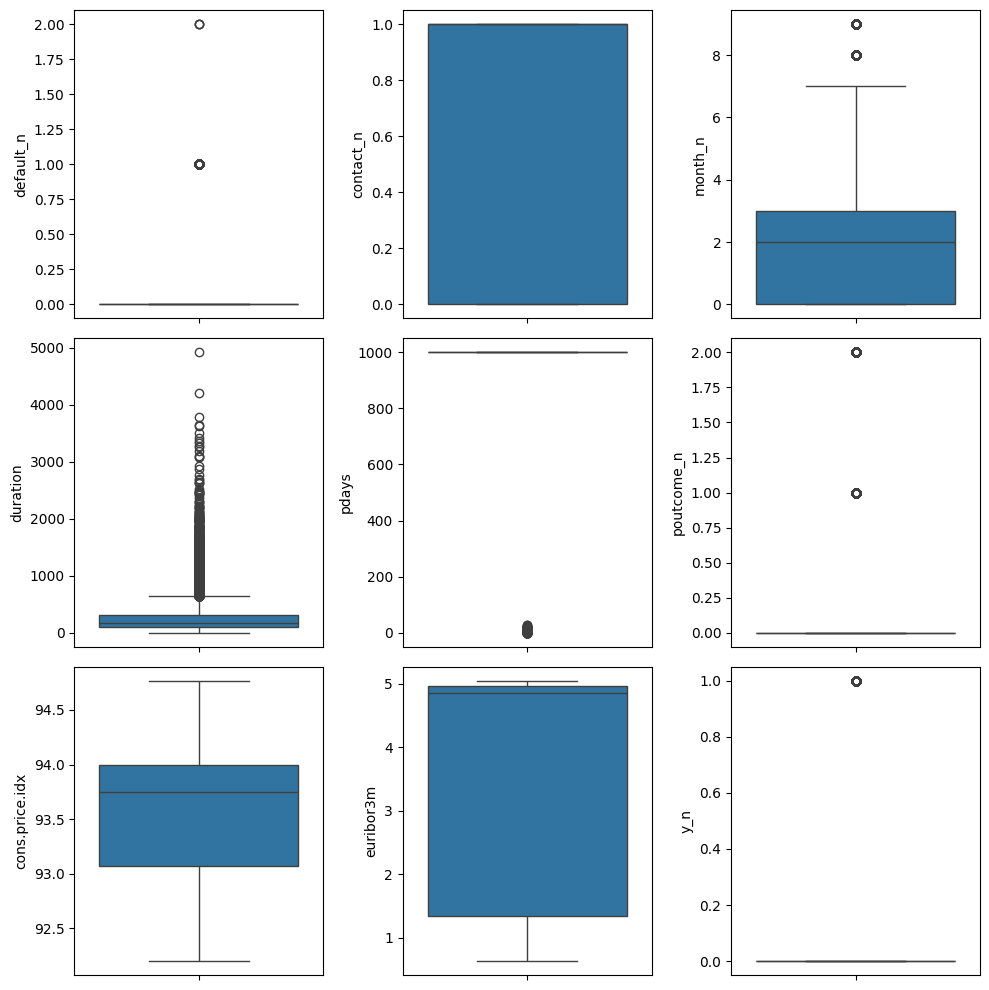

In [26]:
fig, axis = plt.subplots(3, 3, figsize = (10, 10))

sns.boxplot(ax = axis[0, 0], data = new_data, y = "default_n")
sns.boxplot(ax = axis[0, 1], data = new_data, y = "contact_n")
sns.boxplot(ax = axis[0, 2], data = new_data, y = "month_n")
sns.boxplot(ax = axis[1, 0], data = new_data, y = "duration")
sns.boxplot(ax = axis[1, 1], data = new_data, y = "pdays")
sns.boxplot(ax = axis[1, 2], data = new_data, y = "poutcome_n")
sns.boxplot(ax = axis[2, 0], data = new_data, y = "cons.price.idx")
sns.boxplot(ax = axis[2, 1], data = new_data, y = "euribor3m")
sns.boxplot(ax = axis[2, 2], data = new_data, y = "y_n")

plt.tight_layout()

plt.show()

Podemos ver que todas las variables menos *contact_n*, *cons.price.idx* y *euribor3m* son afectadas por valores atípicos. 

En el caso de *pdays*, los valores atípicos son aquellos que sugieren que han pasado muy pocos días entre la culminación de la campaña anterior y la fecha de contacto.

Para la variable *duration*, son considerados atípicos aquellos valores que sugieren una duración de llamada de más de 10 min (o aproximadamente 600 segundos).

Vamos a intentar eliminar algunos datos atípicos:
- *pdays*
- *duration*

Los valores atípicos que mantendremos serán los que vienen de variables categóricas.

Para el resto de las variables, eliminaremos aquellos valores que puedan afectar a los demás datos.

Antes de eliminar los datos atípicos, guardamos los dataset.

In [27]:
new_data_CON_outliers = new_data.copy()

new_data_SIN_outliers = new_data.copy()

In [28]:
# Para cada una de las variables con outliers en mi problema, tengo que reemplazar sus valores del DF
def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(df[column])
  # Remove upper outliers
  df[column] = df[column].apply(lambda x: (x if (x <= upper_limit) else upper_limit) if not pd.isna(x) else np.nan)
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: (x if (x >= lower_limit) else lower_limit) if not pd.isna(x) else np.nan)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in ['pdays', 'duration']:
  new_data_SIN_outliers, limit_list = replace_outliers_from_column(column, new_data_SIN_outliers)
  outliers_dict[column] = limit_list

outliers_dict

{'pdays': [np.float64(999.0), np.float64(999.0)],
 'duration': [0, np.float64(644.5)]}

Luego de eliminar los valores atípicos, analizamos las medidas de dispersión de las variables del dataset:

In [29]:
new_data_SIN_outliers.describe()

,default_n,contact_n,month_n,duration,pdays,poutcome_n,cons.price.idx,euribor3m,y_n
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.0,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.208872,0.634748,2.250097,234.997317,999.0,0.169904,93.575664,3.621291,0.112654
std,0.406686,0.481507,2.429079,177.353309,0.0,0.455754,0.578840,1.734447,0.316173
min,0.000000,0.000000,0.000000,0.000000,999.0,0.000000,92.201000,0.634000,0.000000
25%,0.000000,0.000000,0.000000,102.000000,999.0,0.000000,93.075000,1.344000,0.000000
50%,0.000000,1.000000,2.000000,180.000000,999.0,0.000000,93.749000,4.857000,0.000000
75%,0.000000,1.000000,3.000000,319.000000,999.0,0.000000,93.994000,4.961000,0.000000
max,2.000000,1.000000,9.000000,644.500000,999.0,2.000000,94.767000,5.045000,1.000000


Podemos ver que se eliminaron algunos valores que hacen que los datos tengan más sentido, por ejemplo, limitando el tiempo de duración de las llamadas a 10 min. Los valores de la variable *pdays* parecen no haber sido modificados.

**Análisis de valores faltantes**

No hay valores faltantes en el dataset.

In [30]:
new_data_SIN_outliers.isnull().sum().sort_values(ascending=False)

default_n         0
contact_n         0
month_n           0
duration          0
pdays             0
poutcome_n        0
cons.price.idx    0
euribor3m         0
y_n               0
dtype: int64

**Inferencia de Nuevas Características**

Con las variables disponibles, no vamos a inferir nuevas características.

**Escalado de Valores**

In [31]:
from sklearn.model_selection import train_test_split

num_variables = ["default_n","contact_n","month_n","duration", "pdays", "poutcome_n", "cons.price.idx", "euribor3m"]

# Dividimos el conjunto de datos en muestras de train y test
X_CON = new_data_CON_outliers.drop("y_n", axis = 1)[num_variables]
y = new_data_CON_outliers["y_n"]
X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_CON, y, test_size = 0.2, random_state = 42)

X_SIN = new_data_SIN_outliers.drop("y_n", axis = 1)[num_variables]
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_SIN, test_size = 0.2, random_state = 42)

X_train_con_outliers.head()

,default_n,contact_n,month_n,duration,pdays,poutcome_n,cons.price.idx,euribor3m
12556,1,0,2,94,999,0,93.918,4.960
35451,0,1,0,116,999,0,92.893,1.244
30592,0,1,0,13,999,1,92.893,1.354
17914,0,1,2,94,999,0,93.918,4.961
3315,1,0,0,344,999,0,93.994,4.860


**Normalización**

In [32]:
from sklearn.preprocessing import StandardScaler
import pickle

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_variables)


### NORMALIZAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_variables)

X_train_con_outliers_norm.head()

,default_n,contact_n,month_n,duration,pdays,poutcome_n,cons.price.idx,euribor3m
12556,1.948567,-1.319656,-0.104938,-0.631114,0.194661,-0.373487,0.589080,0.771354
35451,-0.512631,0.757773,-0.929383,-0.546321,0.194661,-0.373487,-1.180760,-1.372028
30592,-0.512631,0.757773,-0.929383,-0.943306,0.194661,1.822906,-1.180760,-1.308581
17914,-0.512631,0.757773,-0.104938,-0.631114,0.194661,-0.373487,0.589080,0.771930
3315,1.948567,-1.319656,-0.929383,0.332441,0.194661,-0.373487,0.720307,0.713674


**Escalado Mínimo-Máximo**

In [33]:
from sklearn.preprocessing import MinMaxScaler

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = num_variables)


### ESCALAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = MinMaxScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = num_variables)

X_train_con_outliers_scal.head()


,default_n,contact_n,month_n,duration,pdays,poutcome_n,cons.price.idx,euribor3m
12556,0.5,0.0,0.222222,0.019113,1.0,0.0,0.669135,0.980730
35451,0.0,1.0,0.000000,0.023587,1.0,0.0,0.269680,0.138291
30592,0.0,1.0,0.000000,0.002643,1.0,0.5,0.269680,0.163228
17914,0.0,1.0,0.222222,0.019113,1.0,0.0,0.669135,0.980957
3315,0.5,0.0,0.000000,0.069947,1.0,0.0,0.698753,0.958059


Almacenamos nuestros nuevos dataset

In [34]:
import openpyxl

X_train_con_outliers.to_excel("../data/processed/X_train_con_outliers.xlsx", index = False)
X_train_sin_outliers.to_excel("../data/processed/X_train_sin_outliers.xlsx", index = False)
X_train_con_outliers_norm.to_excel("../data/processed/X_train_con_outliers_norm.xlsx", index = False)
X_train_sin_outliers_norm.to_excel("../data/processed/X_train_sin_outliers_norm.xlsx", index = False)
X_train_con_outliers_scal.to_excel("../data/processed/X_train_con_outliers_scal.xlsx", index = False)
X_train_sin_outliers_scal.to_excel("../data/processed/X_train_sin_outliers_scal.xlsx", index = False)

X_test_con_outliers.to_excel("../data/processed/X_test_con_outliers.xlsx", index = False)
X_test_sin_outliers.to_excel("../data/processed/X_test_sin_outliers.xlsx", index = False)
X_test_con_outliers_norm.to_excel("../data/processed/X_test_con_outliers_norm.xlsx", index = False)
X_test_sin_outliers_norm.to_excel("../data/processed/X_test_sin_outliers_norm.xlsx", index = False)
X_test_con_outliers_scal.to_excel("../data/processed/X_test_con_outliers_scal.xlsx", index = False)
X_test_sin_outliers_scal.to_excel("../data/processed/X_test_sin_outliers_scal.xlsx", index = False)

y_train.to_excel("../data/processed/y_train.xlsx", index = False)
y_test.to_excel("../data/processed/y_test.xlsx", index = False)

with open("../models/normalizador_con_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_con_outliers, file)

with open("../models/normalizador_sin_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_sin_outliers, file)

with open("../models/scaler_con_outliers.pkl", "wb") as file:
  pickle.dump(scaler_con_outliers, file)

with open("../models/scaler_sin_outliers.pkl", "wb") as file:
  pickle.dump(scaler_sin_outliers, file)

# Selección de Características

Lo primero que haremos para selecconar las variables más importantes para el modelo, es seleccionar un k usando validación cruzada.

In [35]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np


def best_k(x_train, y_train):
    scores = []

    for k in range(1, x_train.shape[1] + 1):
        selector = SelectKBest(score_func=f_regression, k=k)
        X_new = selector.fit_transform(x_train, y_train)

        model = LinearRegression()
        cv_score = cross_val_score(model, X_new, y_train, cv=5, scoring='r2').mean()
        scores.append(cv_score)

    # Mostrar el k con mejor score
    best_k = np.argmax(scores) + 1
    return best_k


Procedemos a seleccionar las caracteristicas más importantes de cada conjunto de datos.

- **X_train_con_outliers**

In [36]:
from sklearn.feature_selection import f_regression, SelectKBest

k = best_k(X_train_con_outliers, y_train)

selection_model = SelectKBest(score_func = f_regression, k = k)
selection_model.fit(X_train_con_outliers, y_train)

ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_con_outliers), columns = X_train_con_outliers.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_con_outliers), columns = X_test_con_outliers.columns.values[ix])

X_train_sel.head()

,default_n,contact_n,month_n,duration,pdays,poutcome_n,cons.price.idx,euribor3m
0,1.0,0.0,2.0,94.0,999.0,0.0,93.918,4.960
1,0.0,1.0,0.0,116.0,999.0,0.0,92.893,1.244
2,0.0,1.0,0.0,13.0,999.0,1.0,92.893,1.354
3,0.0,1.0,2.0,94.0,999.0,0.0,93.918,4.961
4,1.0,0.0,0.0,344.0,999.0,0.0,93.994,4.860


In [37]:
X_test_sel.head()

,default_n,contact_n,month_n,duration,pdays,poutcome_n,cons.price.idx,euribor3m
0,0.0,1.0,0.0,371.0,999.0,1.0,92.893,1.299
1,1.0,0.0,0.0,285.0,999.0,0.0,93.994,4.860
2,0.0,1.0,0.0,52.0,999.0,1.0,92.893,1.313
3,0.0,0.0,1.0,355.0,999.0,0.0,94.465,4.967
4,0.0,1.0,2.0,189.0,999.0,0.0,93.918,4.963


Todas las características son importantes.

**X_train_sin_outliers**

In [38]:
from sklearn.feature_selection import f_regression, SelectKBest

k = best_k(X_train_sin_outliers, y_train)

selection_model = SelectKBest(score_func = f_regression, k = k)
selection_model.fit(X_train_sin_outliers, y_train)

ix = selection_model.get_support()
X_train_sin_outliers_sel = pd.DataFrame(selection_model.transform(X_train_sin_outliers), columns = X_train_sin_outliers.columns.values[ix])
X_test_sin_outliers_sel = pd.DataFrame(selection_model.transform(X_test_sin_outliers), columns = X_test_sin_outliers.columns.values[ix])

X_train_sel.head()

,default_n,contact_n,month_n,duration,pdays,poutcome_n,cons.price.idx,euribor3m
0,1.0,0.0,2.0,94.0,999.0,0.0,93.918,4.960
1,0.0,1.0,0.0,116.0,999.0,0.0,92.893,1.244
2,0.0,1.0,0.0,13.0,999.0,1.0,92.893,1.354
3,0.0,1.0,2.0,94.0,999.0,0.0,93.918,4.961
4,1.0,0.0,0.0,344.0,999.0,0.0,93.994,4.860


In [39]:
X_test_sel.head()

,default_n,contact_n,month_n,duration,pdays,poutcome_n,cons.price.idx,euribor3m
0,0.0,1.0,0.0,371.0,999.0,1.0,92.893,1.299
1,1.0,0.0,0.0,285.0,999.0,0.0,93.994,4.860
2,0.0,1.0,0.0,52.0,999.0,1.0,92.893,1.313
3,0.0,0.0,1.0,355.0,999.0,0.0,94.465,4.967
4,0.0,1.0,2.0,189.0,999.0,0.0,93.918,4.963


Todas las características son importantes.

- **X_train_con_outliers_norm**

In [40]:
from sklearn.feature_selection import f_regression, SelectKBest

k = best_k(X_train_con_outliers_norm, y_train)

selection_model = SelectKBest(score_func = f_regression, k = k)
selection_model.fit(X_train_con_outliers_norm, y_train)

ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_con_outliers_norm), columns = X_train_con_outliers_norm.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_con_outliers_norm), columns = X_test_con_outliers_norm.columns.values[ix])

X_train_sel.head()

,default_n,contact_n,month_n,duration,pdays,poutcome_n,cons.price.idx,euribor3m
0,1.948567,-1.319656,-0.104938,-0.631114,0.194661,-0.373487,0.589080,0.771354
1,-0.512631,0.757773,-0.929383,-0.546321,0.194661,-0.373487,-1.180760,-1.372028
2,-0.512631,0.757773,-0.929383,-0.943306,0.194661,1.822906,-1.180760,-1.308581
3,-0.512631,0.757773,-0.104938,-0.631114,0.194661,-0.373487,0.589080,0.771930
4,1.948567,-1.319656,-0.929383,0.332441,0.194661,-0.373487,0.720307,0.713674


In [41]:
X_test_sel.head()

,default_n,contact_n,month_n,duration,pdays,poutcome_n,cons.price.idx,euribor3m
0,-0.512631,0.757773,-0.929383,0.436505,0.194661,1.822906,-1.180760,-1.340304
1,1.948567,-1.319656,-0.929383,0.105042,0.194661,-0.373487,0.720307,0.713674
2,-0.512631,0.757773,-0.929383,-0.792991,0.194661,1.822906,-1.180760,-1.332229
3,-0.512631,-1.319656,-0.517161,0.374837,0.194661,-0.373487,1.533570,0.775391
4,-0.512631,0.757773,-0.104938,-0.264963,0.194661,-0.373487,0.589080,0.773084


Todas las características son importantes.

- **X_train_sin_outliers_norm**

In [42]:
from sklearn.feature_selection import f_regression, SelectKBest

k = best_k(X_train_sin_outliers_norm, y_train)

selection_model = SelectKBest(score_func = f_regression, k = k)
selection_model.fit(X_train_sin_outliers_norm, y_train)

ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_sin_outliers_norm), columns = X_train_sin_outliers_norm.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_sin_outliers_norm), columns = X_test_sin_outliers_norm.columns.values[ix])

X_train_sel.head()

,default_n,contact_n,month_n,duration,pdays,poutcome_n,cons.price.idx,euribor3m
0,1.948567,-1.319656,-0.104938,-0.793616,0.0,-0.373487,0.589080,0.771354
1,-0.512631,0.757773,-0.929383,-0.669341,0.0,-0.373487,-1.180760,-1.372028
2,-0.512631,0.757773,-0.929383,-1.251173,0.0,1.822906,-1.180760,-1.308581
3,-0.512631,0.757773,-0.104938,-0.793616,0.0,-0.373487,0.589080,0.771930
4,1.948567,-1.319656,-0.929383,0.618599,0.0,-0.373487,0.720307,0.713674


In [43]:
X_test_sel.head()

,default_n,contact_n,month_n,duration,pdays,poutcome_n,cons.price.idx,euribor3m
0,-0.512631,0.757773,-0.929383,0.771118,0.0,1.822906,-1.180760,-1.340304
1,1.948567,-1.319656,-0.929383,0.285316,0.0,-0.373487,0.720307,0.713674
2,-0.512631,0.757773,-0.929383,-1.030867,0.0,1.822906,-1.180760,-1.332229
3,-0.512631,-1.319656,-0.517161,0.680736,0.0,-0.373487,1.533570,0.775391
4,-0.512631,0.757773,-0.104938,-0.256974,0.0,-0.373487,0.589080,0.773084


Todas las caracteristicas son importantes.

- **X_train_con_outliers_scal**

In [44]:
from sklearn.feature_selection import f_regression, SelectKBest

k = best_k(X_train_con_outliers_scal, y_train)

selection_model = SelectKBest(score_func = f_regression, k = k)
selection_model.fit(X_train_con_outliers_scal, y_train)

ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_con_outliers_scal), columns = X_train_con_outliers_scal.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_con_outliers_scal), columns = X_test_con_outliers_scal.columns.values[ix])

X_train_sel.head()

,default_n,contact_n,month_n,duration,pdays,poutcome_n,cons.price.idx,euribor3m
0,0.5,0.0,0.222222,0.019113,1.0,0.0,0.669135,0.980730
1,0.0,1.0,0.000000,0.023587,1.0,0.0,0.269680,0.138291
2,0.0,1.0,0.000000,0.002643,1.0,0.5,0.269680,0.163228
3,0.0,1.0,0.222222,0.019113,1.0,0.0,0.669135,0.980957
4,0.5,0.0,0.000000,0.069947,1.0,0.0,0.698753,0.958059


In [45]:
X_test_sel.head()

,default_n,contact_n,month_n,duration,pdays,poutcome_n,cons.price.idx,euribor3m
0,0.0,1.0,0.000000,0.075437,1.0,0.5,0.269680,0.150759
1,0.5,0.0,0.000000,0.057950,1.0,0.0,0.698753,0.958059
2,0.0,1.0,0.000000,0.010573,1.0,0.5,0.269680,0.153933
3,0.0,0.0,0.111111,0.072184,1.0,0.0,0.882307,0.982317
4,0.0,1.0,0.222222,0.038430,1.0,0.0,0.669135,0.981410


Todas las características son importantes.

- **X_train_sin_outliers_scal**

In [46]:
from sklearn.feature_selection import f_regression, SelectKBest

k = best_k(X_train_sin_outliers_scal, y_train)

selection_model = SelectKBest(score_func = f_regression, k = k)
selection_model.fit(X_train_sin_outliers_scal, y_train)

ix = selection_model.get_support()
X_train_sin_outliers_scal_sel = pd.DataFrame(selection_model.transform(X_train_sin_outliers_scal), columns = X_train_sin_outliers_scal.columns.values[ix])
X_test_sin_outliers_scal_sel = pd.DataFrame(selection_model.transform(X_test_sin_outliers_scal), columns = X_test_sin_outliers_scal.columns.values[ix])

X_train_sin_outliers_scal_sel.head()

,default_n,contact_n,month_n,duration,poutcome_n,cons.price.idx,euribor3m
0,0.5,0.0,0.222222,0.145849,0.0,0.669135,0.980730
1,0.0,1.0,0.000000,0.179984,0.0,0.269680,0.138291
2,0.0,1.0,0.000000,0.020171,0.5,0.269680,0.163228
3,0.0,1.0,0.222222,0.145849,0.0,0.669135,0.980957
4,0.5,0.0,0.000000,0.533747,0.0,0.698753,0.958059


In [47]:
X_test_sin_outliers_scal_sel.head()

,default_n,contact_n,month_n,duration,poutcome_n,cons.price.idx,euribor3m
0,0.0,1.0,0.000000,0.575640,0.5,0.269680,0.150759
1,0.5,0.0,0.000000,0.442203,0.0,0.698753,0.958059
2,0.0,1.0,0.000000,0.080683,0.5,0.269680,0.153933
3,0.0,0.0,0.111111,0.550815,0.0,0.882307,0.982317
4,0.0,1.0,0.222222,0.293251,0.0,0.669135,0.981410


Todas las características son importantes.

Tener el mismo número de característica entre los datos con y sin outliers puede deberse a la eliminación de variables que se hizo en los pasos anteriores. Al sacar aquellas variables con una correlación a la variable objetivo menor a 0.1, obtenemos un conjunto de datos donde todas las variables tienen importancia para el modelo.

# Regresion Logistica

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

datasets = [
    X_train_con_outliers,
    X_train_sin_outliers,
    X_train_con_outliers_norm,
    X_train_sin_outliers_norm,
    X_train_con_outliers_scal,
    X_train_sin_outliers_scal,
]

test_sets = [
    X_test_con_outliers,
    X_test_sin_outliers,
    X_test_con_outliers_norm,
    X_test_sin_outliers_norm,
    X_test_con_outliers_scal,
    X_test_sin_outliers_scal,
]

results = []
models = []

for X_train, X_test in zip(datasets, test_sets):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred_test)
    results.append(acc)
    models.append((model, y_pred_test))

print(results)
best_index = results.index(max(results))
print("Mejor conjunto de datos:", best_index)

[0.9072590434571498, 0.9005826656955572, 0.9081087642631707, 0.9003398883224083, 0.9051954357853847, 0.9002184996358339]
Mejor conjunto de datos: 2


A partir de los datos de entrenamiento, vemos que el mejor dataset es X_train_con_outliers_norm.

**Matriz de Confusión**

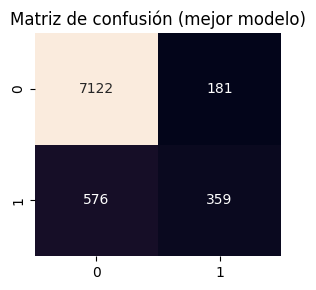

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

best_model, best_y_pred = models[best_index]
lt_deposit_cm = confusion_matrix(y_test, best_y_pred)

# Visualizar matriz de confusión
plt.figure(figsize=(3, 3))
sns.heatmap(pd.DataFrame(lt_deposit_cm), annot=True, fmt="d", cbar=False)
plt.title("Matriz de confusión (mejor modelo)")
plt.tight_layout()
plt.show()

Esta matriz de confusión se interpreta:

- **True positive (TP)**: corresponde al número 7122 y se refiere a los casos en los que el modelo predijo correctamente que el cliente no tomará un  largo plazo.
- **True negative (TN)**: Corresponde to the number 359 y se refiere a los casos en los que el modelo predijo correctamente que el cliente tomará un  largo plazo.
- **False positive (FP)**: Corresponde al número 181 y se refiere a los casos en los que el modelo predijo que el cliente no toma el crédito, pero en realidad sí toma el crédito..
- **False negative (FN)**: Corresponde al número 576 y se refiere a los casos en los que el modelo predijo que el cliente toma el crédito, pero en realidad no toma el crédito.

**Optimización de los Resultados**

El modelo base con todos sus hiperparámetros obtiene una exactitud de 91%. Modificar los parámetros podría mejorar los resultados considerablemente. Utilizaremos el método de Grid Search.

In [51]:
from sklearn.model_selection import GridSearchCV

hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

grid = GridSearchCV(best_model, hyperparams, scoring = "accuracy", cv = 5)
grid

,estimator,LogisticRegression()
,param_grid,"{'C': [0.001, 0.01, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['newton-cg', 'lbfgs', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [52]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train_con_outliers_norm, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


Usamos los hiperparámetros obtenidos al evaluar cada posibilidad.

In [53]:
model_grid = LogisticRegression(penalty = "l2", C = 1, solver = "lbfgs")
model_grid.fit(X_train_con_outliers_norm, y_train)
y_pred = model_grid.predict(X_test_con_outliers_norm)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.9081087642631707

Obtenemos el mismo valor para la exactitud. Esto puede deberse a que el modelo ya nos da el mejor rendimiento posible.